# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
# Your code here
import pandas as pd
import numpy as np

paysim = pd.read_csv('../paysim.csv')
paysim = paysim.sample(n = 100000)
#paysim.head()
paysim[paysim['isFraud'] == 1].shape

(143, 11)

In [2]:
paysim.shape

(100000, 11)

In [3]:
paysim.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000
mean,243.437640,1.765842e+05,8.287685e+05,8.496867e+05,1.091891e+06,1.212894e+06,0.001430,0.000010
std,141.907062,5.705220e+05,2.868099e+06,2.900593e+06,3.324259e+06,3.615968e+06,0.037788,0.003162
min,1.000000,1.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.341808e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.429371e+04,1.404792e+04,0.000000e+00,1.348900e+05,2.137431e+05,0.000000,0.000000
75%,334.000000,2.085098e+05,1.065495e+05,1.410326e+05,9.379300e+05,1.107317e+06,0.000000,0.000000
max,741.000000,5.132412e+07,4.489219e+07,3.489219e+07,2.495665e+08,2.496098e+08,1.000000,1.000000


In [4]:
paysim.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig = plt.subplots(figsize = (10,10))
sns.heatmap(paysim.corr(), annot = True)

### What is the distribution of the outcome? 

In [20]:
print(paysim['isFraud'].value_counts())
143/100000


0    99857
1      143
Name: isFraud, dtype: int64


0.00143

### Your response here
- A very small portion, only 0.1% are fraud

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [9]:
# Your code here
paysim.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
paysim['type'].unique()

array(['CASH_OUT', 'PAYMENT', 'TRANSFER', 'CASH_IN', 'DEBIT'],
      dtype=object)

In [11]:
type_int = {'PAYMENT' : 0, 'TRANSFER' : 1, 'CASH_OUT' : 2, 'DEBIT' : 3, 'CASH_IN' : 4}
paysim['type_int'] = [type_int[x] for x in paysim['type']]
paysim['balanceOrig_diff'] = paysim['newbalanceOrig'] - paysim['oldbalanceOrg']
paysim['balanceDest_diff'] = paysim['newbalanceDest'] - paysim['oldbalanceDest']
paysim.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_int,balanceOrig_diff,balanceDest_diff
3377225,254,CASH_OUT,13165.31,C201466268,0.00,0.00,C632611315,492122.40,505287.71,0,0,2,0.00,13165.31
4147139,303,CASH_OUT,55343.20,C2011179529,136848.83,81505.63,C411075855,428598.62,483941.81,0,0,2,-55343.20,55343.19
5303308,373,PAYMENT,8368.53,C1941674691,18147.00,9778.47,M1884421033,0.00,0.00,0,0,0,-8368.53,0.00
2899073,228,CASH_OUT,316121.24,C1132564664,0.00,0.00,C30339021,686869.82,1002991.06,0,0,2,0.00,316121.24
1355746,138,PAYMENT,1194.88,C650664408,0.00,0.00,M1582915637,0.00,0.00,0,0,0,0.00,0.00


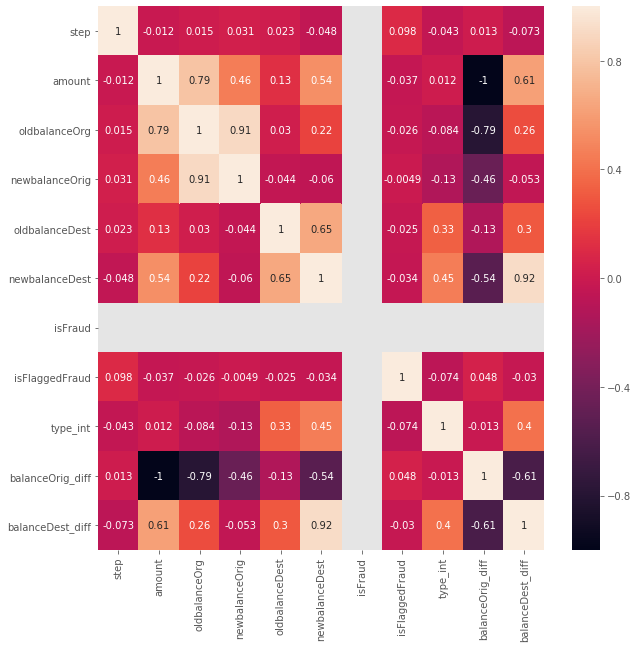

In [13]:
plt.style.use('ggplot')
fraud = paysim[paysim['isFraud'] == 1]
f = plt.subplots(figsize = (10,10))
sns.heatmap(fraud.corr(), annot = True)

### Run a logisitc regression classifier and evaluate its accuracy.

In [16]:
# Your code here
from sklearn.linear_model import LogisticRegression
#X = paysim[['amount', 'balanceOrig_diff']]
X = paysim.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis = 1)
y = paysim['isFraud']
model = LogisticRegression().fit(X,y)
model.score(X,y)

C:\Users\dandoye\Anaconda3\envs\ironhack\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dandoye\Anaconda3\envs\ironhack\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.99667

### Now pick a model of your choice and evaluate its accuracy.

In [17]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 2).fit(X,y)
model.score(X,y)

0.9994

In [18]:
from sklearn.svm import SVC
model = SVC(gamma = 'scale').fit(X,y)
model.score(X,y)

0.99895

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X,y)
model.score(X,y)

1.0

### Which model worked better and how do you know?

### Your response here
- Decison tree worked better with slightly better accuracy, however all worked really well because there is an exact relationship between 'amount' and 'balanceOrig_diff' that indicates whether something is fraud or not.